In [1]:
# lesson imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# =ignore warningn
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data
import prepare


In [2]:
# exercise imports
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import prepare
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm
%matplotlib inline

import seaborn as sns
plt.rc('figure', figsize=(13, 7))
# plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('fivethirtyeight')

In [3]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [4]:
# Load data from the aquire module
df = get_store_data()
df.head(3)

Data is cached. Reading from .csv files
Items data acquired...
Stores data acquired...
Sales data acquired...
Acquisition complete


,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [5]:
df = prepare.prep_store_data(df)

In [6]:
df.head()

,quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,1,2013,294.00


In [7]:
# Create CSV of prepare data so it can load faster
# df.to_csv('all_data.csv')

In [8]:
# # Read data of the new CSV
# df = pd.read_csv('all_data.csv')
# df.head()

In [9]:
# # sort by date/time before resampling or doing other time series manipulations
# df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

In [10]:
# df.set_index('sale_date').sort_index()

In [11]:
df.head()

,quantity,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,year,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,2013,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,1,2013,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,1,2013,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,1,2013,294.00


In [12]:
# turn quntity to an interger 
df['quantity'] = df.quantity.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity       913000 non-null  int64  
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  int64  
 7   item_upc14     913000 non-null  int64  
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  int64  
 13  month          913000 non-null  int64  
 14  year           913000 non-null  int64  
 15  sales_total    913000 non-null  float64
dtypes: float64(2), int64(9), obj

In [14]:
# look at max and min dates
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='GMT'),
 Timestamp('2017-12-31 00:00:00+0000', tz='GMT'))

In [15]:
# count nullos 
df.isna().sum()

quantity         0
sale_id          0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
month            0
year             0
sales_total      0
dtype: int64

In [16]:
# split the data into train and test using the human based methode  

train = df[:'2016']
test = df['2017']

In [17]:
# # ------> percentage way to split the data <-------

# train_size = .70
# n = df.shape[0]
# test_start_index = round(train_size * n)

# train = df[:test_start_index] # everything up (not including) to the test_start_index
# test = df[test_start_index:] # everything from the test_start_index to the end

# plt.plot(train.index, train.temp)
# plt.plot(test.index, test.temp)

In [18]:
type(train)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='sale_date'>

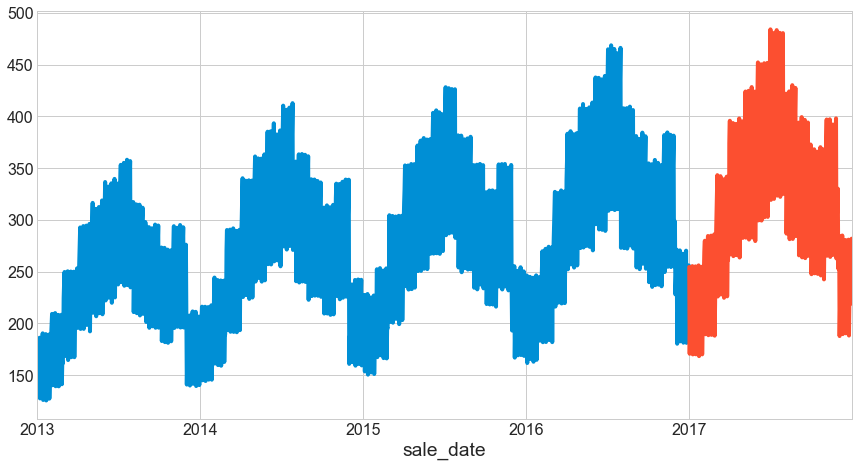

In [19]:
# Visualize the split data

train.resample('d').sales_total.mean().plot()
test.resample('d').sales_total.mean().plot()

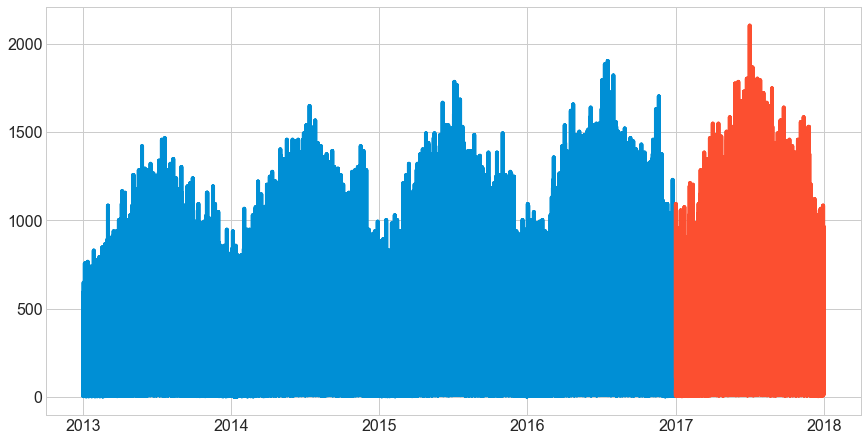

In [20]:
# use a ddiferent plot to visulize same data
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [21]:
# set target variable 
y = train.sales_total

y.head()


sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
Name: sales_total, dtype: float64

## Don't consider the time series
One of the first things we could do is to ignore the time series component of our data, and use all the other visualzation techniques we know to our data.

- For example, we can make a histogram to show the distribution of our target variable:


<AxesSubplot:ylabel='Frequency'>

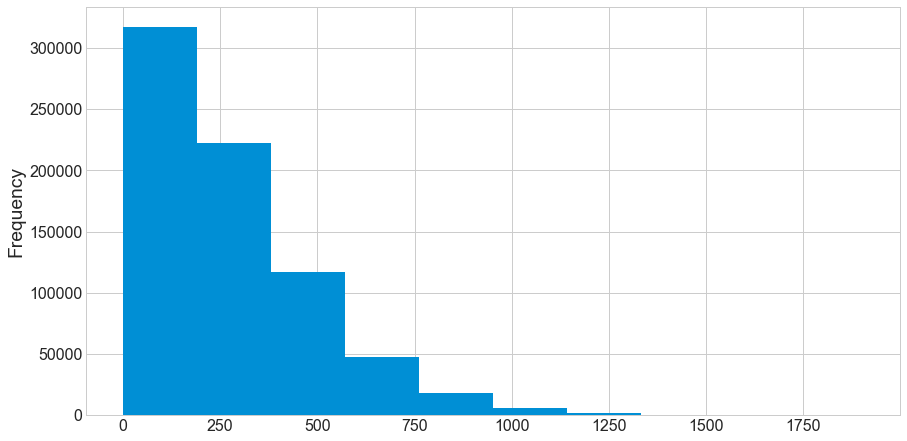

In [22]:
# histogram of trget variable 
y.plot.hist()


[Text(0.5, 1.0, 'Average Total Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales Total')]

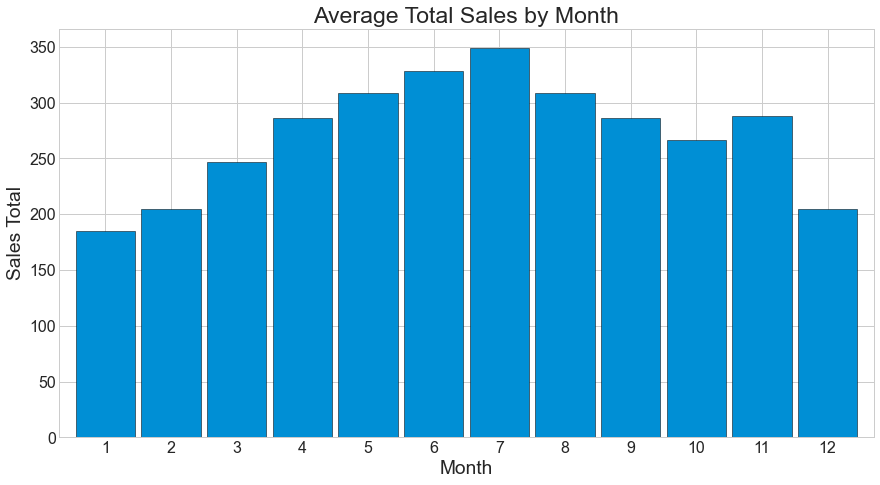

In [23]:
# We could also treat components of the date as a seperate categorical feature.

ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Month', xlabel='Month', ylabel='Sales Total')

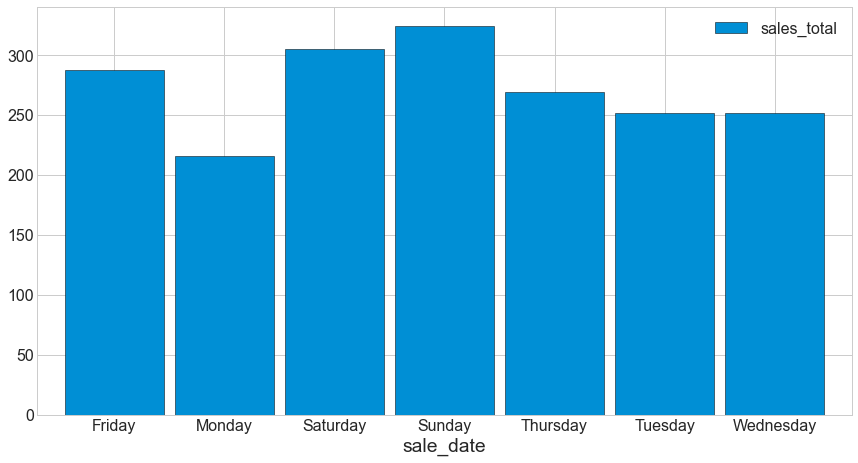

In [24]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Total Sales by Day of the Week', xlabel='Day of the Week', ylabel='Average dollars Sold')
plt.legend()

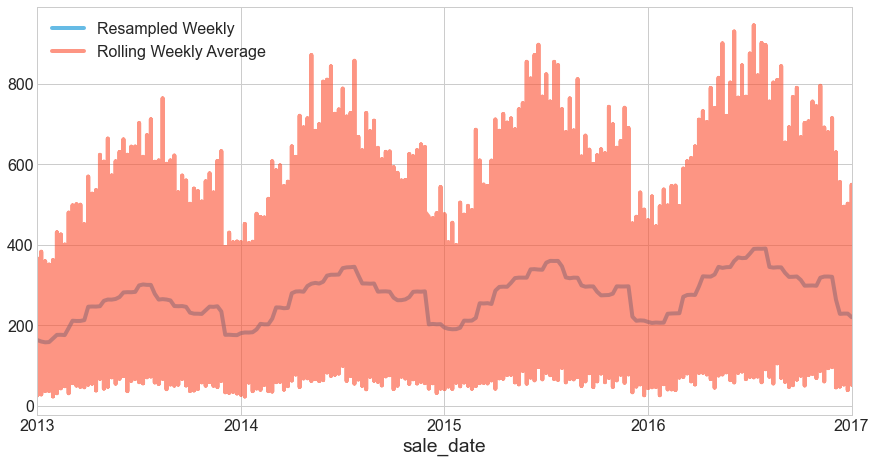

In [25]:
# Plot the weekly average & the 7-day moving average. Compare the 2 plots.

y.resample('W').mean().plot(label='Resampled Weekly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

<AxesSubplot:title={'center':' Every 2 Days'}, xlabel='sale_date'>

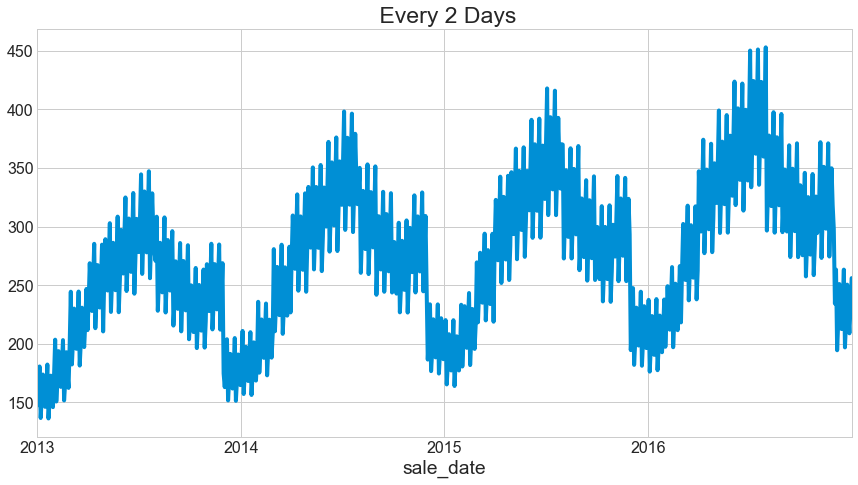

In [26]:
y.resample('2d').mean().plot(title=' Every 2 Days')

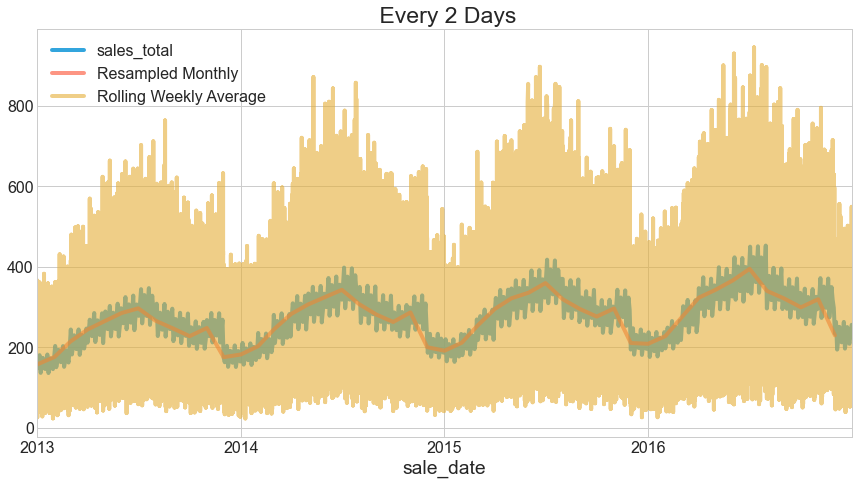

In [27]:
# Combie graphs
y.resample('2d').mean().plot(title=' Every 2 Days', alpha=.8)
y.resample('m').mean().plot(label='Resampled Monthly', alpha=.6)
y.rolling(7).mean().plot(label='Rolling Weekly Average', alpha=.6)
plt.legend()

## Visualize change over time
We can use the .diff method to visualize the change in temperature from one time period to the next.

Text(0, 0.5, 'Difference in sales from one day to the next')

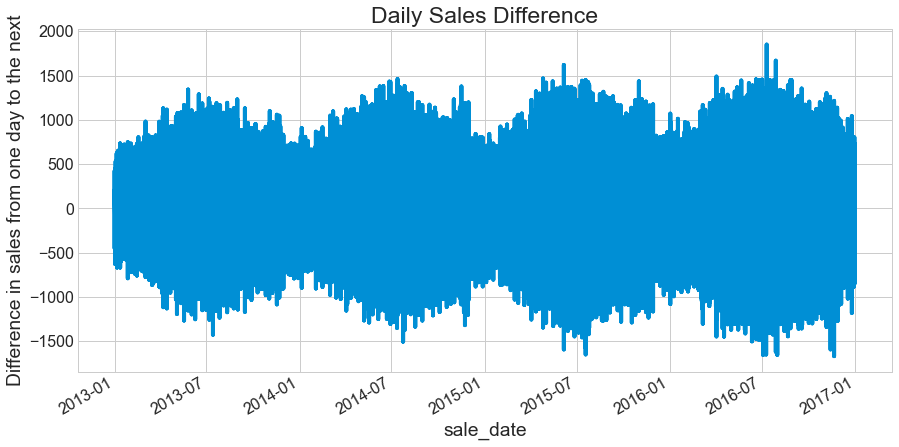

In [28]:
# Plot the daily difference in sales  
# is the change constent or drastic?

y.diff().plot()
plt.title('Daily Sales Difference')
plt.ylabel('Difference in sales from one day to the next')

Text(0, 0.5, '% Change')

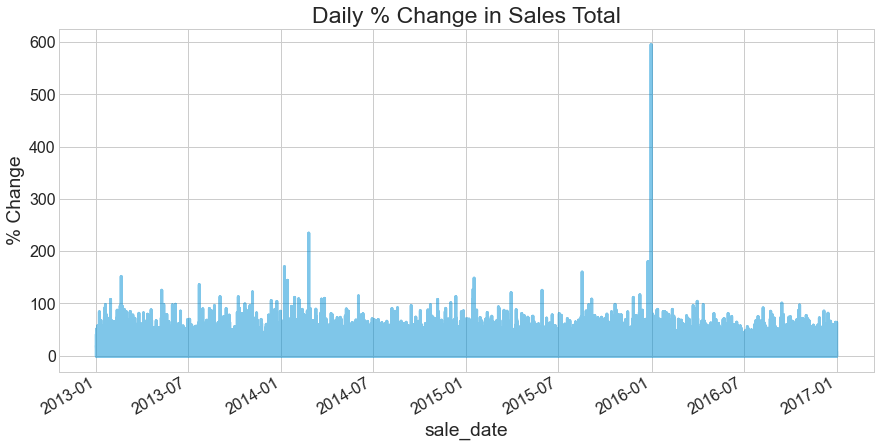

In [29]:
# Maybe it would be helpful to look at percent change as well:

(y.diff() / y.shift()).plot(alpha=.5, lw=3)
plt.title('Daily % Change in Sales Total')
plt.ylabel('% Change')

## Weekly Changes vs Monthly Changes

[Text(0.5, 1.0, 'Monthly % Change in Sales Total')]

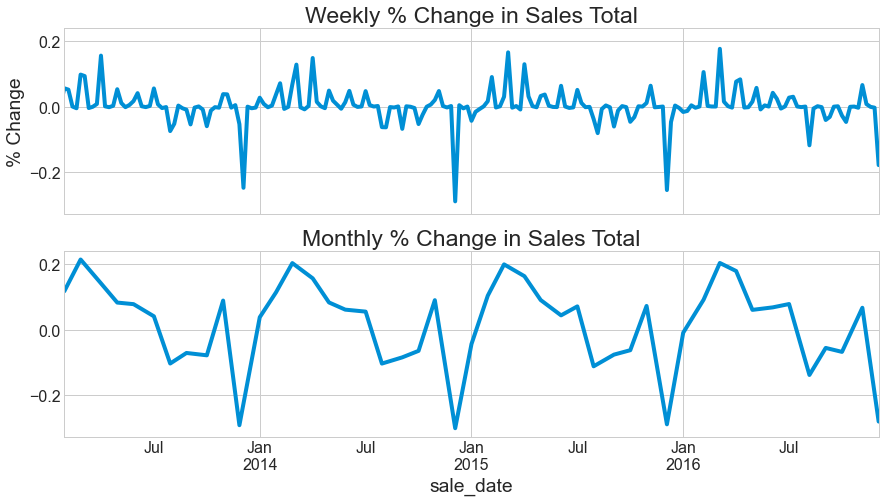

In [30]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)

weekly = y.resample('W').mean()
(weekly.diff() / weekly.shift()).plot(ax=ax1)
ax1.set(title='Weekly % Change in Sales Total', ylabel='% Change', xlabel='')

monthly = y.resample('M').mean()
(monthly.diff() / monthly.shift()).plot(ax=ax2)
ax2.set(title='Monthly % Change in Sales Total')
# ax2.hlines(0, *ax2.get_xlim())

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

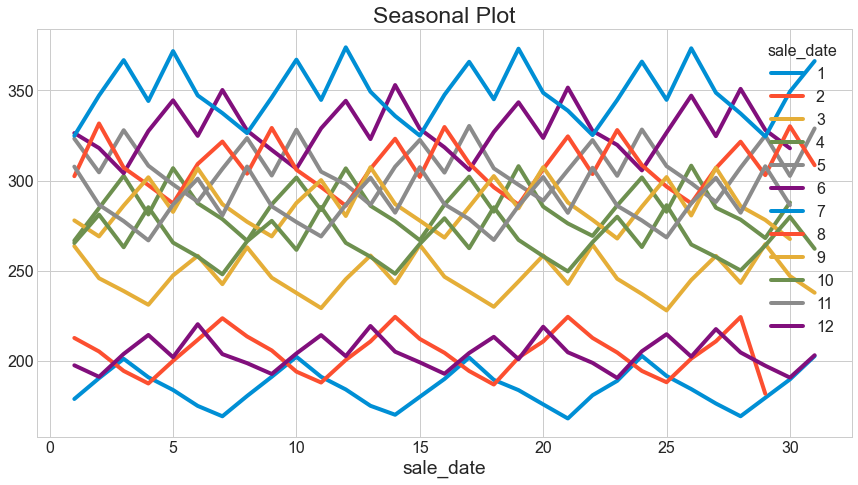

In [31]:
# Sesonal plot to understand the monthly changes
y.groupby([y.index.month, y.index.day]).mean().unstack(0).plot(title='Seasonal Plot')


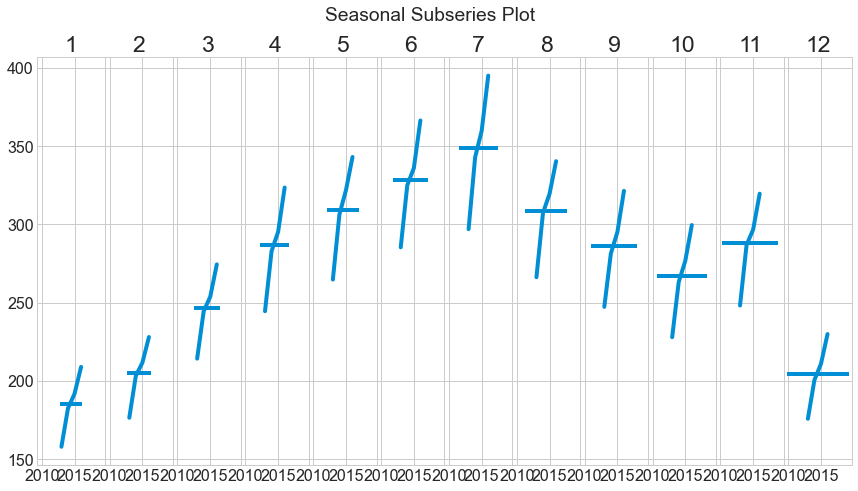

In [32]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)


Text(0.5, 1.0, 'Lag plot with lag=1')

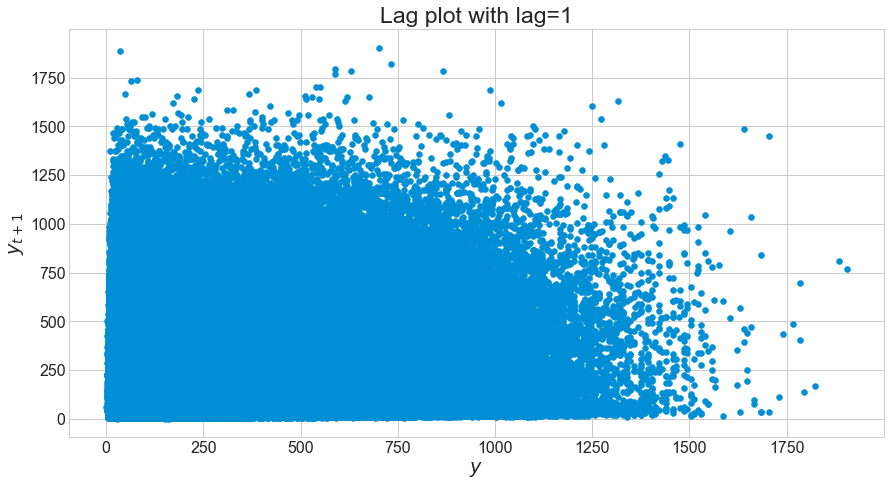

In [33]:
# Lag plot 
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

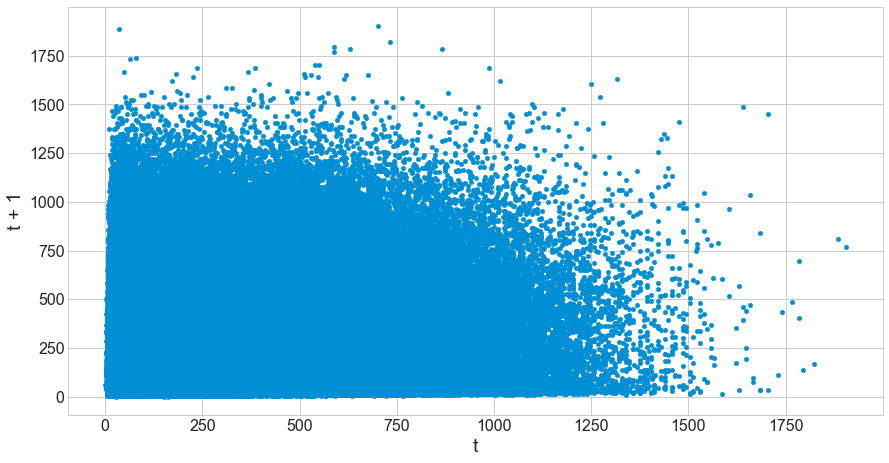

In [34]:
train['y(t + 1)'] = train.sales_total.shift(-1)
ax = train.plot.scatter(x='sales_total', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

# thre is some tipe of trend but hard to see, Lets try weekly data

,quantity,sale_id,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,month,year,this_week,y(t + 1),the_next_week
sale_date,,,,,,,,,,,,,
2013-01-06 00:00:00+00:00,30.355667,455590.5,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,1.000000,2013.0,163.589167,163.605777,159.981203
2013-01-13 00:00:00+00:00,29.686286,455597.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,1.000000,2013.0,159.981203,159.969446,157.946720
2013-01-20 00:00:00+00:00,29.414286,455604.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,1.000000,2013.0,157.946720,157.948240,158.545383
2013-01-27 00:00:00+00:00,29.513714,455611.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,1.000000,2013.0,158.545383,158.595803,167.585014
2013-02-03 00:00:00+00:00,31.150571,455618.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,1.428571,2013.0,167.585014,167.577874,176.455603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-04 00:00:00+00:00,49.016857,457018.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,11.571429,2016.0,263.768997,263.805471,228.559894
2016-12-11 00:00:00+00:00,42.618571,457025.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,12.000000,2016.0,228.559894,228.513729,229.298643
2016-12-18 00:00:00+00:00,42.682286,457032.0,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,12.000000,2016.0,229.298643,229.377874,229.231000


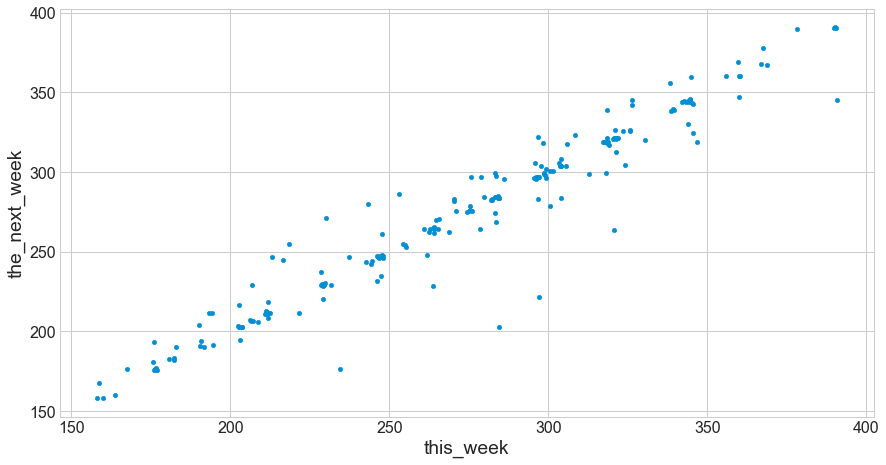

In [35]:
# lag plot with weekly data 
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

# Lienar correlation can now be seen

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

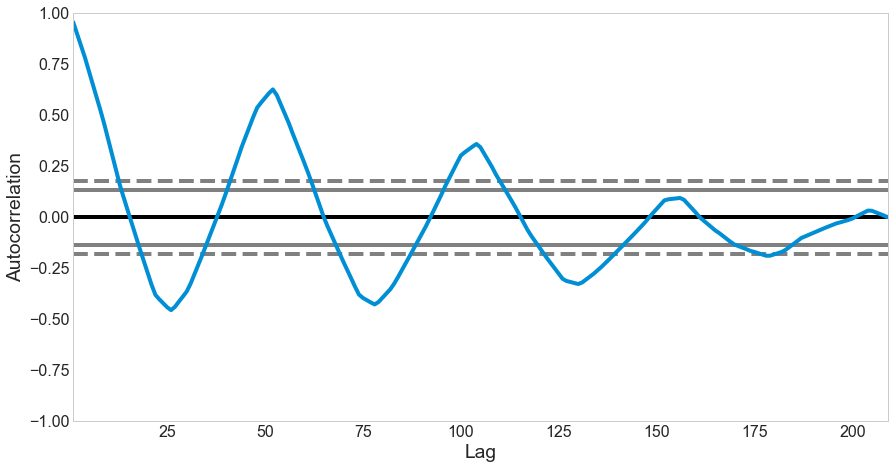

In [36]:
# Autocorrelation after weekly resampling:
# Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.


pd.plotting.autocorrelation_plot(y.resample('W').mean())

This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.



Seasonal Decomposition
Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

**Additive seasonal decomposition model:**

$yt=St+Tt+Rt$

**Multiplicative model:**

$yt=St×Tt×Rt$

In [37]:
# Use the seasonal_decompose function from the 'statsmodels' library to perform the  'Additive seasonal decomposition model'
import statsmodels.api as sm

y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()



,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,163.589167,NaN,-77.434789,NaN
2013-01-13 00:00:00+00:00,159.981203,NaN,-79.225757,NaN
2013-01-20 00:00:00+00:00,157.946720,NaN,-79.904284,NaN
2013-01-27 00:00:00+00:00,158.545383,NaN,-80.259357,NaN
2013-02-03 00:00:00+00:00,167.585014,NaN,-77.352692,NaN


<AxesSubplot:xlabel='sale_date'>

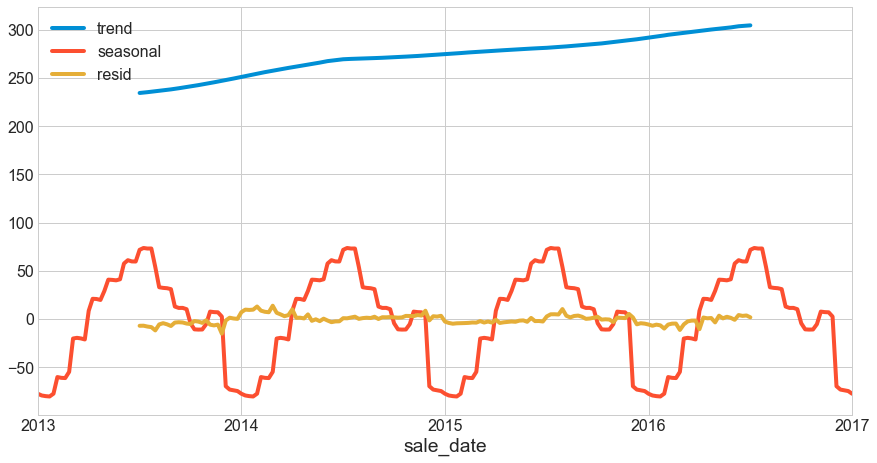

In [38]:
# plot the dcomposition
decomposition.iloc[:, 1:].plot()

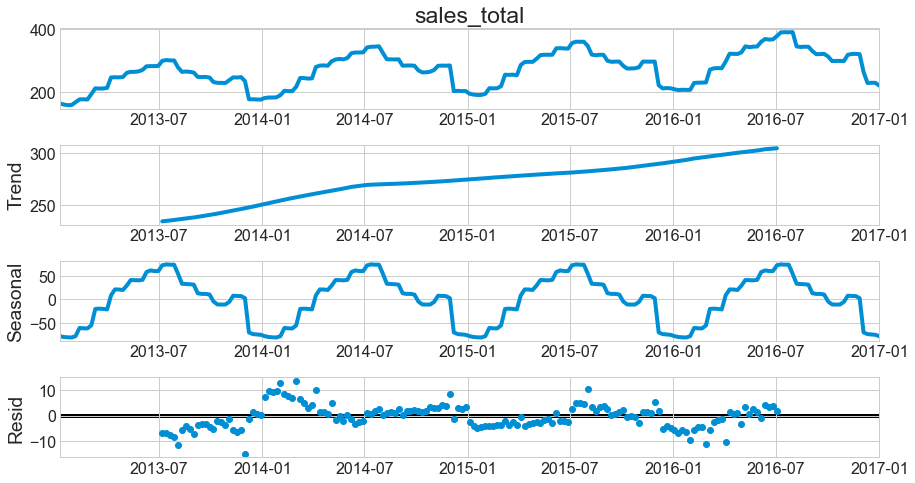

In [39]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

## Categories over time
How can we visualize categories over time?

In [43]:
train = train.resample('D').mean()
# create a categorical feature
train['sales_total_bin'] = pd.qcut(train.sales_total, 5, labels=['low_sales', 'nee_improvement ', 'very_average', 'a_little_better', 'sales_are_hot'])
train.groupby('sales_total_bin').mean()

,quantity,sale_id,item_id,item_price,item_upc12,item_upc14,store_id,store_zipcode,month,year,sales_total,y(t + 1)
sales_total_bin,,,,,,,,,,,,
low_sales,33.978082,456078.006826,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,4.962457,2013.972696,182.696760,182.739367
nee_improvement,43.193671,456236.660959,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,6.373288,2014.291096,232.182886,232.201398
very_average,50.218445,456290.996575,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,7.085616,2014.380137,270.040782,270.021790
a_little_better,57.391219,456411.345890,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,7.232877,2014.698630,308.512858,308.523053
sales_are_hot,68.326685,456573.811644,25.5,5.1604,2.384688e+11,2.384688e+11,5.5,78224.8,6.965753,2015.164384,367.335747,367.284958


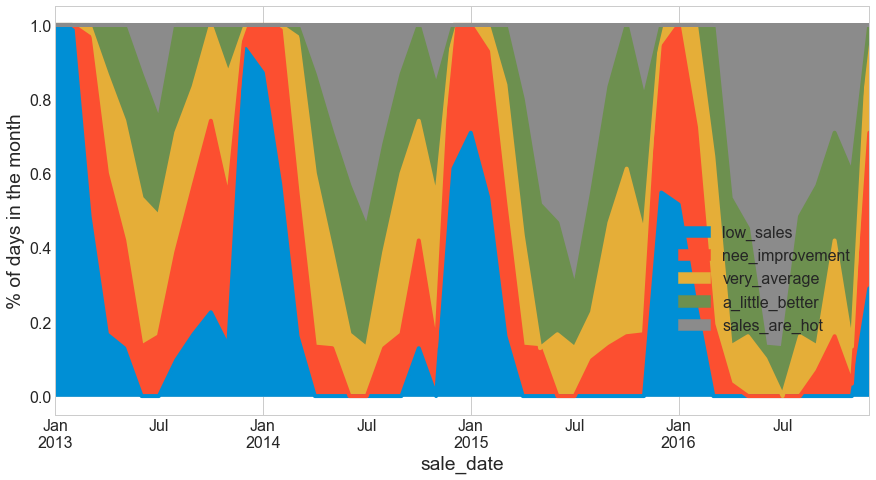

In [56]:
(train.groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')
plt.legend(loc=1, bbox_to_anchor=(0.5, 0., 0.5, 0.5),\
           shadow = True, framealpha = .1,\
          edgecolor='purple')


# ----------------------OPS DATA --------------------------


In [57]:
power =pd.read_csv("https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv")
power = prepare.prep_opsd_data(power)

In [58]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   consumption     4383 non-null   float64
 1   wind            4383 non-null   float64
 2   solar           4383 non-null   float64
 3   wind_and_solar  4383 non-null   float64
 4   month           4383 non-null   int64  
 5   year            4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [62]:
power.shape, f'{power.isna().sum().sum()} are null values'

((4383, 6), '0 are null values')